In [34]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing.csv')
df.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [37]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='income_cat'>

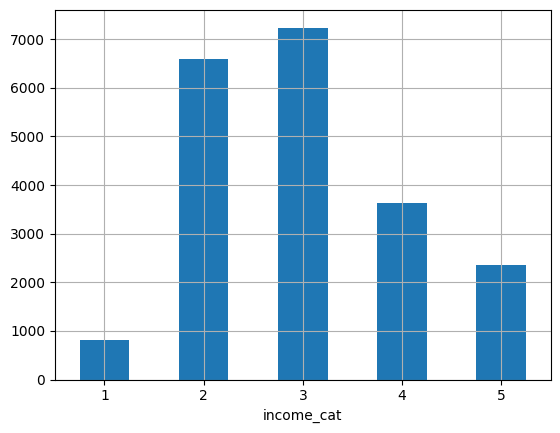

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
# df = pd.read_csv('housing.csv')
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, stratify=df['income_cat'], random_state=42)

In [40]:
## Check stratification
train['income_cat'].value_counts() / len(train['income_cat'])
test['income_cat'].value_counts() / len(test['income_cat'])


income_cat
3    0.350568
2    0.318868
4    0.176287
5    0.114480
1    0.039798
Name: count, dtype: float64

income_cat
3    0.350614
2    0.318798
4    0.176357
5    0.114341
1    0.039890
Name: count, dtype: float64

In [41]:
train.drop('income_cat', axis=1, inplace=True)
test.drop('income_cat',  axis=1, inplace=True)

In [42]:
train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8577     -118.41     33.89                31.0       1428.0           320.0   
5960     -117.83     34.11                29.0       2671.0           437.0   
4753     -118.33     34.04                31.0       1090.0           251.0   
15423    -117.26     33.20                13.0       3163.0           725.0   
9788     -120.51     35.91                39.0        768.0           162.0   

       population  households  median_income  median_house_value  \
8577        677.0       331.0         7.2316            500001.0   
5960       1484.0       445.0         4.9844            203000.0   
4753        955.0       239.0         2.9130            192500.0   
15423      1675.0       629.0         2.8214            121900.0   
9788        264.0       118.0         5.3245            250000.0   

      ocean_proximity  
8577        <1H OCEAN  
5960           INLAND  
4753        <1H OCEAN  
15423       <1H OCEAN  
9788           INLAND

In [43]:
corr_matrix = train.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687873
total_rooms           0.136801
housing_median_age    0.116305
households            0.066788
total_bedrooms        0.049523
population           -0.024592
longitude            -0.052345
latitude             -0.137864
Name: median_house_value, dtype: float64

Text(0.5, 1.0, 'Correlation Plot')

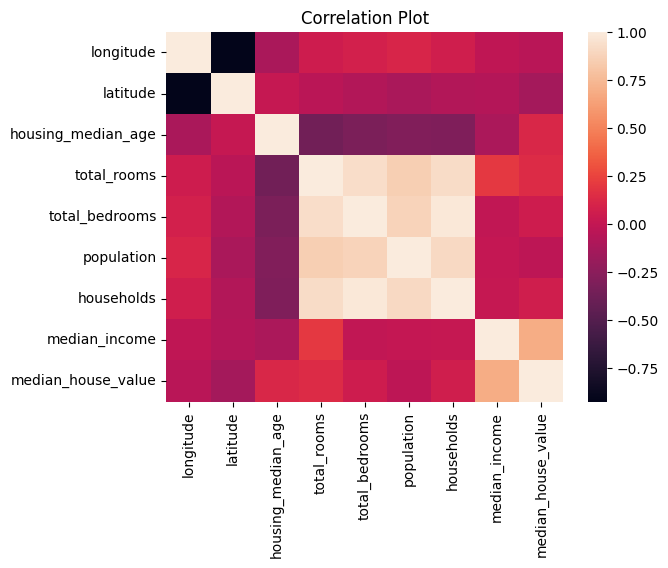

In [44]:
import seaborn as sns 
sns.heatmap(train.select_dtypes(exclude='object').corr()).set_title('Correlation Plot')

Text(0.5, 1.0, 'Ocean Proximity Analysis for Median House Value')

<Axes: title={'center': 'Ocean Proximity Analysis for Median House Value'}, xlabel='ocean_proximity', ylabel='median_house_value'>

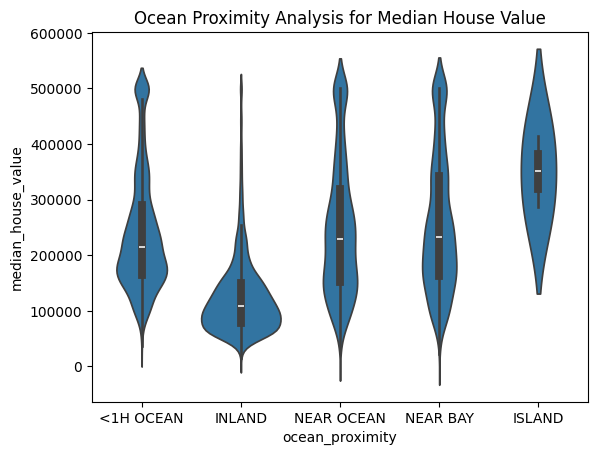

In [45]:
plt.title('Ocean Proximity Analysis for Median House Value')
sns.violinplot(x='ocean_proximity', y='median_house_value', data=train)
plt.show()

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class Preprocessor(BaseEstimator, TransformerMixin): 
    # Train our custom preprocessors 
    numerical_columns = [
        'longitude', 
        'latitude', 
        'housing_median_age', 
        'total_rooms',
        'total_bedrooms', 
        'population', 
        'households', 
        'median_income', 
    ]
    categorical_columns = [
        'ocean_proximity'
    ]
    
    def fit(self, X, y=None): 

        # Create and fit simple imputer
        self.imputer = SimpleImputer(strategy='median')
        self.imputer.fit(X[self.numerical_columns])
        
        # Create and fit Standard Scaler 
        self.scaler = StandardScaler()
        self.scaler.fit(X[self.numerical_columns]) 
        
        # Create and fit one hot encoder
        self.onehot = OneHotEncoder(handle_unknown='ignore')
        self.onehot.fit(X[self.categorical_columns])
        
        return self 

    def transform(self, X): 
        
        # Apply simple imputer 
        imputed_cols = self.imputer.transform(X[self.numerical_columns])
        onehot_cols = self.onehot.transform(X[self.categorical_columns])
        
        # Copy the df 
        transformed_df = X.copy()
         
        # Apply transformed columns
        transformed_df[self.numerical_columns] = imputed_cols
        transformed_df[self.numerical_columns] = self.scaler.transform(transformed_df[self.numerical_columns])        
        
        # Drop existing categorical columns and replace with one hot equivalent
        transformed_df = transformed_df.drop(self.categorical_columns, axis=1) 
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        
        return transformed_df

In [47]:
preprocessor = Preprocessor()
preprocessor.fit(train)
train_fixed = preprocessor.transform(train)

Preprocessor()

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 8577 to 7730
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14308 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   median_house_value  14448 non-null  float64
 9   ocean_proximity     14448 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [49]:
train_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 8577 to 7730
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   14448 non-null  float64
 1   latitude                    14448 non-null  float64
 2   housing_median_age          14448 non-null  float64
 3   total_rooms                 14448 non-null  float64
 4   total_bedrooms              14448 non-null  float64
 5   population                  14448 non-null  float64
 6   households                  14448 non-null  float64
 7   median_income               14448 non-null  float64
 8   median_house_value          14448 non-null  float64
 9   ocean_proximity_<1H OCEAN   14448 non-null  int64  
 10  ocean_proximity_INLAND      14448 non-null  int64  
 11  ocean_proximity_ISLAND      14448 non-null  int64  
 12  ocean_proximity_NEAR BAY    14448 non-null  int64  
 13  ocean_proximity_NEAR OCEAN  14448 

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
rfr = make_pipeline(Preprocessor(), RandomForestRegressor(n_estimators=50))

In [51]:
rfr

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50))])

In [52]:
y_train = train['median_house_value']
X_train = train.drop('median_house_value', axis=1)
rfr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50))])

In [53]:
params = rfr.get_params()
params 

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('randomforestregressor', RandomForestRegressor(n_estimators=50))],
 'transform_input': None,
 'verbose': False,
 'preprocessor': Preprocessor(),
 'randomforestregressor': RandomForestRegressor(n_estimators=50),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__monotonic_cst': None,
 'randomforestregressor__n_estimators': 50,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor

In [54]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
y_train_hat=rfr.predict(X_train)
root_mean_squared_error(y_train, y_train_hat)
mean_absolute_error(y_train, y_train_hat)

18767.033106537758

12080.438223975636

In [55]:
y_test = test['median_house_value']
X_test = test.drop('median_house_value', axis=1)

In [56]:
y_test_hat=rfr.predict(X_test)
rm2e = root_mean_squared_error(y_test, y_test_hat)
mae = mean_absolute_error(y_test, y_test_hat)

In [58]:
import mlflow
from mlflow.models import infer_signature

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("Predict Median California House Price new new")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric("root_mean_squared_error", rm2e)
    mlflow.log_metric("mean_absolute_error", mae)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "RandomForestRegressor model for housing data, n_estimators=50")

    # Infer the model signature
    signature = infer_signature(X_train, rfr.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=rfr,
        artifact_path="housing_model",
        signature=signature,
        input_example=preprocessor.transform(X_train),
        registered_model_name="rfr_moodel_n_estimators=50",
    )

2025/01/14 14:53:54 INFO mlflow.tracking.fluent: Experiment with name 'Predict Median California House Price new new' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/647408797292739871', creation_time=1736846634938, experiment_id='647408797292739871', last_update_time=1736846634938, lifecycle_stage='active', name='Predict Median California House Price new new', tags={}>

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

Registered model 'rfr_moodel_n_estimators=50' already exists. Creating a new version of this model...
2025/01/14 14:53:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: rfr_moodel_n_estimators=50, version 5


🏃 View run persistent-eel-411 at: http://127.0.0.1:8080/#/experiments/647408797292739871/runs/60e26b4f26f9464b955a6d889c5b98ce
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/647408797292739871


Created version '5' of model 'rfr_moodel_n_estimators=50'.


In [31]:
export MLFLOW_TRACKING_URI=http://127.0.0.1:8080  
# $Env:MLFLOW_TRACKING_URI = "http://127.0.0.1:8080"

# https://github.com/pyenv-win/pyenv-win
# mlflow models serve -m runs:/60e26b4f26f9464b955a6d889c5b98ce/housing_model -p 5000

SyntaxError: invalid syntax (501499900.py, line 1)

In [60]:
import json
import requests

payload = json.dumps({'inputs': {
  "longitude": -121.84,
  "latitude": 36.94,
  "housing_median_age": 29.0,
  "total_rooms": 4921.0,
  "total_bedrooms": 967.0,
  "population": 2320.0,
  "households": 823.0,
  "median_income": 10,
  "ocean_proximity": "NEAR OCEAN"
}})
response = requests.post(
    url=f"http://localhost:5002/invocations",
    data=payload,
    headers={"Content-Type": "application/json"},
)
print(response.json())



{'predictions': [500001.0]}


In [31]:
options = {}
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', ]
for column in numerical_columns:
    options[column] = (X_train[column].min(),  X_train[column].max())
for column in ['ocean_proximity',]:
    options[column] = sorted(X_train[column].unique().tolist())
options

{'longitude': (np.float64(-124.3), np.float64(-114.31)),
 'latitude': (np.float64(32.55), np.float64(41.92)),
 'housing_median_age': (np.float64(1.0), np.float64(52.0)),
 'total_rooms': (np.float64(6.0), np.float64(37937.0)),
 'total_bedrooms': (np.float64(2.0), np.float64(5471.0)),
 'population': (np.float64(3.0), np.float64(35682.0)),
 'households': (np.float64(2.0), np.float64(5189.0)),
 'median_income': (np.float64(0.4999), np.float64(15.0001)),
 'ocean_proximity': ['<1H OCEAN',
  'INLAND',
  'ISLAND',
  'NEAR BAY',
  'NEAR OCEAN']}

In [32]:
import json
json.dump(options, open('input_options.json', 'w'), indent=2)

In [ ]:
mlflow models build-docker -m runs:/6ad3945606e746d5beedaaf6a1022362/housing_model -n housing_modelv1 --enable-mlserver

docker tag sha256:776f023269ff847a5dbf8ce81cd10130fec2b672c7742c57af47460a38a23569 mkzia/house_models